In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/20220303/full.csv')

In [3]:
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [4]:
df_full =  df.to_numpy()
df_full[:10]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77]])

In [5]:
import numpy as np
weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [6]:
df_full.shape

(56, 3)

In [7]:
len(weight)

56

In [8]:
# 데이터 분리

In [9]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target =  train_test_split(df_full,weight,random_state=42)

### 다항 특성 만들기 - 다항식

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly =  PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]])
# 1(bias), 2, 3, 2**2, 2*3, 3**2

array([[2., 3., 4., 6., 9.]])

In [12]:
# 사이킷런의 변환기
poly =  PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [13]:
train_poly[:1]

array([[ 19.6   ,   5.14  ,   3.04  , 384.16  , 100.744 ,  59.584 ,
         26.4196,  15.6256,   9.2416]])

In [14]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [15]:
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

### 선형회귀모델에서 x의 값을 다중으로 넣으면--> 다중 회귀 모델

In [16]:
from sklearn.linear_model import LinearRegression
lr =  LinearRegression()
lr.fit(train_poly,train_target)
lr.score(train_poly,train_target), lr.score(test_poly,test_target)

(0.9903183436982125, 0.9714559911594155)

### 특성을 좀더 많이 만들기

In [17]:
# 사이킷런의 변환기
poly =  PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape,   test_poly.shape

((42, 55), (14, 55))

In [18]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [19]:
lr =  LinearRegression()
lr.fit(train_poly,train_target)
lr.score(train_poly,train_target), lr.score(test_poly,test_target)

(0.9999999999938143, -144.40744532797535)

### 학습데이터는 잘 반영...그런데 너무 잘반영 -->과 적합.... 그래서 학습하지 않은 데이터는 오히려 못맞추는 경향
### -->과적합
### 과적합을 해결하기 위해 규제를 한다.
##  규제전에 표준화를 한다.

In [20]:
# 표준화.   (값 - mean 평균)std 표준편차   -1 ~ 1
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled =  ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
print(train_scaled[:1], test_scaled[:1])
train_scaled.shape,  test_scaled.shape

[[-1.01339619 -1.01007487 -1.01952321 -0.9549757  -0.9496784  -0.95745849
  -0.93942079 -0.94342509 -0.94100107 -0.88757122 -0.88399964 -0.89100599
  -0.87785292 -0.88311456 -0.88430909 -0.8691891  -0.87259422 -0.87147928
  -0.86603533 -0.82233944 -0.82171953 -0.8280588  -0.81928269 -0.82512549
  -0.8278857  -0.81486775 -0.82006923 -0.82177279 -0.82010716 -0.80835934
  -0.81274154 -0.81321125 -0.8098514  -0.80275974 -0.7637909  -0.76597773
  -0.77150714 -0.76668667 -0.77246614 -0.77577893 -0.76571689 -0.77162398
  -0.77472752 -0.77517751 -0.76290623 -0.76877311 -0.77148634 -0.77113383
  -0.767785   -0.75814062 -0.76376113 -0.76586966 -0.76449499 -0.75967179
  -0.75143746]] [[-2.29657672 -2.0645632  -1.95288184 -1.55255604 -1.46585499 -1.45227925
  -1.38306012 -1.36853915 -1.3414385  -1.16487216 -1.12766176 -1.12993021
  -1.09096504 -1.0919529  -1.08681842 -1.05473034 -1.05422049 -1.04733556
  -1.03445922 -0.95097661 -0.93581382 -0.94095847 -0.92003743 -0.92481854
  -0.9257405  -0.90344

((42, 55), (14, 55))

### 릿지 회귀

In [22]:
from sklearn.linear_model import Ridge

In [23]:
ridge =  Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled,train_target), ridge.score(test_scaled,test_target) 

(0.9896101671037343, 0.979069397761539)

### 규제를 통해서 과적합된 학습을 조정하는 역활
### alpha라는 파라메터를 조정해서 선능좋은 모델을 찾아보자
### 하이퍼 파라메터 튜닝

In [25]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

In [26]:
alpha_list =[0.001,0.01,0.1,1,10,100]

In [27]:
for alpha in alpha_list:
    ridge =  Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

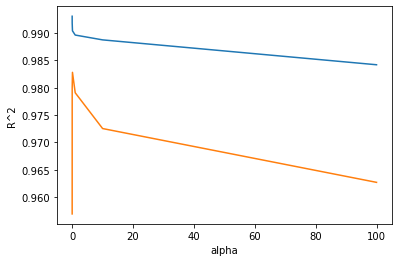

In [33]:
plt.plot(alpha_list,train_score)
plt.plot(alpha_list,test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [31]:
alpha_list, np.log10(alpha_list)

([0.001, 0.01, 0.1, 1, 10, 100], array([-3., -2., -1.,  0.,  1.,  2.]))

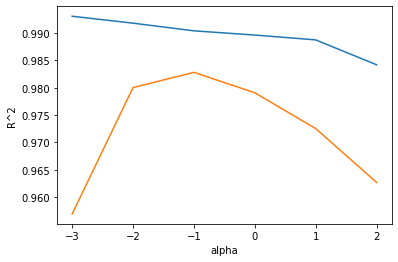

In [34]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [36]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target)

(0.9903815817570368, 0.9827976465386954)

# 라쏘

In [38]:
from sklearn.linear_model import Lasso

In [39]:
lasso =  Lasso()
# 훈련
lasso.fit(train_scaled,train_target)
# train 데이터에 대한 결정계수 R^2   score
lasso.score(train_scaled,train_target), lasso.score(test_scaled, test_target)


(0.989789897208096, 0.9800593698421884)

### 하이퍼 파라메터 튜닝

In [70]:
train_score = []
test_score = []

In [71]:
alpha_list = [0.1,1.0,10,100]

In [72]:
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha,max_iter=10000)
    lasso.fit(train_scaled,train_target)
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

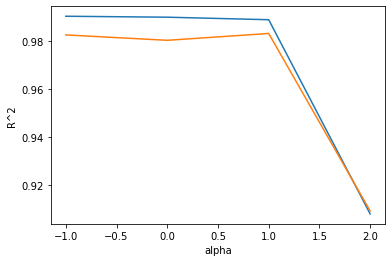

In [74]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [76]:
train_score, np.log10(alpha_list)

([0.9902080238600284,
  0.9898116789062786,
  0.9887624603020236,
  0.9078618674946647],
 array([-1.,  0.,  1.,  2.]))

In [ ]:
# alpha = 10